In [227]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable, Tuple
import math

In [228]:
def midpoint_method(
    xn: float,
    yn: float,
    f: Callable[[],Tuple[Callable[[float,float],float],Callable[[float,float],float]]],
    dt: float,
) -> Tuple[float, float]:
    fx,fy = f()
    kx = dt * fx(xn, yn)
    ky = dt * fy(xn, yn)
    xnp1 = xn + dt * fx(xn + kx/2, yn + ky/2)
    ynp1 = yn + dt * fy(xn + kx/2, yn + ky/2)
    return xnp1, ynp1

In [229]:
def initial_conditions_f():
    n = 16
    return [(x, y) for x in np.linspace(-3, 6, n) for y in np.linspace(-3, 6, n)]

In [230]:
def make_phase_plot(initial_conditions, f, al, ah, stability_points):
    for condition in initial_conditions:
        dt = 0.1
        t = 0
        x_axis = [float(condition[0])]
        y_axis = [float(condition[1])]
        times = [t]
        
        while t < 10:
            xnp1, ynp1 = midpoint_method(x_axis[-1], y_axis[-1], f, dt)
            x_axis.append(xnp1)
            y_axis.append(ynp1)
            t += dt
            times.append(t)
        # Plot the data points with gradient colors
        plt.plot(x_axis, y_axis, color='blue', linewidth=0.2)
        
        # Add arrows to indicate direction
        for j in range(0, len(x_axis) - 1, 100):
            plt.arrow(x_axis[j], y_axis[j], x_axis[j+1] - x_axis[j], y_axis[j+1] - y_axis[j], 
                    fc='blue', ec='blue', head_width=al, head_length=al)
        
        for point in stability_points:
            plt.scatter(point[0], point[1], color='red', s=15)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(initial_conditions[0][0], initial_conditions[-1][0])
    plt.ylim(initial_conditions[0][1], initial_conditions[-1][1])
    plt.grid(True)
    plt.show()

In [231]:
def system():
    dx = lambda x, y: x * (3.0 - x - 2.0 * y)
    dy = lambda x, y: y * (2.0 - x - y)
    return dx, dy

stability_points = [
    (0, 0),
    (0, 2),
    (1, 1),
    (3, 0),
]

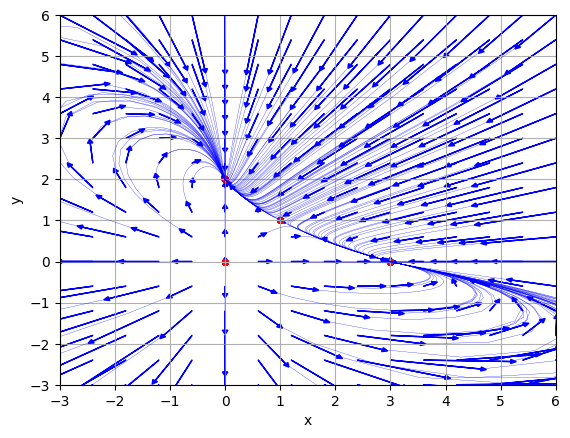

In [232]:
ic = initial_conditions_f()
make_phase_plot(ic, system, 0.1, 0.2, stability_points)